# Fake News Prediction using Machine Learning with Python

#### Dataset Description

   ###### train.csv: A full training dataset with the following attributes:

       1) id: unique id for a news article
        
       2) title: the title of a news article
        
       3) author: author of the news article
        
       4) text: the text of the article; could be incomplete
        
       5) label: a label that marks the article as potentially unreliable
        
                1: unreliable / Fake
                0: reliable / Real




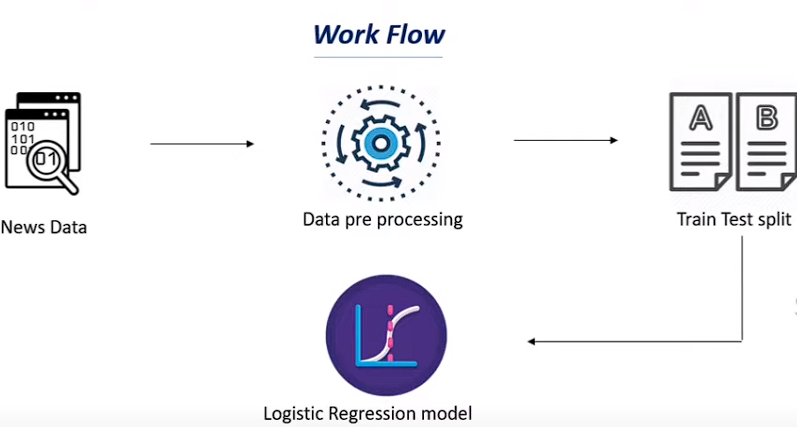

In [1]:
# Required Library
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Swapnil
[nltk_data]     Alaspure\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
# Importing Data
data = pd.read_csv('train.csv')
data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [5]:
# Data Shape
data.shape

(20800, 5)

In [6]:
# Drop Duplicated Rows
data.drop_duplicates(inplace=True)

In [7]:
# Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 975.0+ KB


In [8]:
# Null Value
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
# Replacing the Null Values with empty string
data = data.fillna('')

In [10]:
# Merging the Author Name and News Title
data['content'] = data['author']+' '+data['title']

data.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [11]:
# Now We are drop col
data.drop(columns=['title','author','text'],inplace=True)

data.head()

,id,label,content
0,0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,1,Consortiumnews.com Why the Truth Might Get You...
3,3,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,1,Howard Portnoy Iranian woman jailed for fictio...


In [12]:
# Separating the data & label
X = data.drop(columns='label', axis=1)
Y = data['label']

### Here We Are Using Stemming 
            Stemming:
            
            Stemming is a text normalization process that involves reducing words to their base or root form. The goal of               
            stemming is to group together words that are derived from the same root, even if they have different suffixes               
            or prefixes. This can be useful in natural language processing and information retrieval tasks where variations             
            of words should be treated as the same.
            
            Example: Actor, Actress, Acting --> Act

In [13]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

# Create a Porter Stemmer object
stem = PorterStemmer()

# Function for stemming
def stemming(content):
    # Remove non-alphabetic characters and tokenize the content
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    
    # Convert to lowercase
    stemmed_content = stemmed_content.lower()
    
    # Tokenize the content
    stemmed_content = stemmed_content.split()
    
    # Apply stemming using Porter Stemmer and remove stopwords
    stemmed_content = [stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    
    # Join the stemmed words back into a string
    stemmed_content = ' '.join(stemmed_content)
    
    return stemmed_content


# Applying 
data['content'] = data['content'].apply(stemming)

data.head()

,id,label,content
0,0,1,darrel lucu hous dem aid even see comey letter...
1,1,0,daniel j flynn flynn hillari clinton big woman...
2,2,1,consortiumnew com truth might get fire
3,3,1,jessica purkiss civilian kill singl us airstri...
4,4,1,howard portnoy iranian woman jail fiction unpu...


In [14]:
# Separating the data and label
X = data['content'].values
Y = data['label'].values

In [15]:
print("X Values :-->",'\n', X)
print('\n')
print("Y Values :-->",'\n', Y)

X Values :--> 
 ['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


Y Values :--> 
 [1 0 1 ... 0 1 1]


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the text data (X)
vectorizer.fit(X)

# Transform the text data (X) using the fitted vectorizer
X = vectorizer.transform(X)
print(X)


  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

                                 - - - - - - - - X X X X X X X X - - - - - - - -

### Splitting the dataset to training & test data

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.2, 
                                                    stratify=Y, 
                                                    random_state=2)

### Training the Model: Logistic Regression Using Randomized Search CV

In [18]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'fit_intercept': [True, False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 200],
    'class_weight': [None, 'balanced']
            }

# Create a Logistic Regression model
logreg = LogisticRegression()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    logreg,
    param_distributions=param_grid,
    n_iter=10,                            # Number of parameter settings that are sampled
    cv=StratifiedKFold(n_splits=5, 
                       shuffle=True, 
                       random_state=42),  # Cross-validation strategy
    verbose=2,
    random_state=42,
    n_jobs=-1,                            # Use all available CPUs
    scoring='accuracy'                    # You can use other scoring metrics
            )

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, Y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

# Get the best model
best_model = random_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, Y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:  {'solver': 'saga', 'penalty': 'none', 'max_iter': 100, 'fit_intercept': True, 'class_weight': None, 'C': 11.288378916846883}
Best Accuracy:  0.9900240384615385


LogisticRegression(C=11.288378916846883, penalty='none', solver='saga')

                                 - - - - - - - - X X X X X X X X - - - - - - - -

### Evaluation

In [19]:
from sklearn.metrics import accuracy_score

# Make predictions on the training data using the trained model
X_train_prediction = best_model.predict(X_train)

# Calculate the accuracy score
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [20]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


                                 - - - - - - - - X X X X X X X X - - - - - - - -

In [21]:
# Make predictions on the test data using the trained model
X_test_prediction = best_model.predict(X_test)

# Calculate the accuracy score on the test data
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


In [22]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9925480769230769


In [23]:
from sklearn.metrics import classification_report

# Calculate and print the classification report
print("Classification Report:")
print(classification_report(Y_test, X_test_prediction))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



                                 - - - - - - - - X X X X X X X X - - - - - - - -

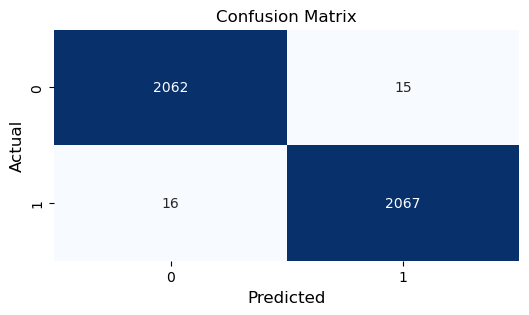

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Make predictions on the test data using the best model
X_test_prediction = best_model.predict(X_test)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(Y_test, 
                               X_test_prediction)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 3))

sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            cbar=False,
            xticklabels=best_model.classes_, 
            yticklabels=best_model.classes_)

plt.title('Confusion Matrix',size = 12)
plt.xlabel('Predicted',size = 12)
plt.ylabel('Actual',size = 12)
plt.show()


##### 1: Unreliable / Fake
##### 0: Reliable / Real

                                 - - - - - - - - X X X X X X X X - - - - - - - -

### Making a Predictive System

In [25]:
X_new = X_test[3]

prediction = best_model.predict(X_new)
print(prediction)

if (prediction[0]==0):
    print('The news is Real')
else:
    print('The news is Fake')

[0]
The news is Real


                                 - - - - - - - - X X X X X X X X - - - - - - - -